In [2]:
#Team IIDE
#Izabella Wieckowska, Elai Shalev, Derrick Au, Sophia Zhou

import pandas as pd
import statistics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Infant mortality rate (per 1000 live births     -0.702155
Fertility rate, total (live births per woman)   -0.635398
Employment: Agriculture (% of employed)         -0.579133
Food production index (2004-2006=100)           -0.087777
Agricultural production index (2004-2006=100)   -0.079540
Name: Happiness, dtype: float64
Economy: Services and other activity (% of GVA)          0.580328
Urban population (% of total population)                 0.666212
Employment: Services (% of employed)                     0.709983
GDP per capita (current US$)                             0.729044
Mobile-cellular subscriptions (per 100 inhabitants).1    0.789833
Name: Happiness, dtype: float64


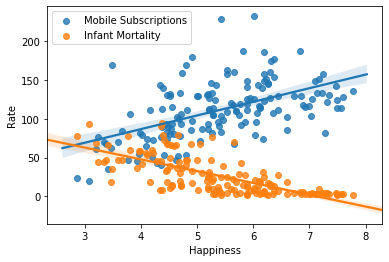

In [36]:
#Elai
#The stats file has many more countries listed than the happiness file
#so we cleaned out the countries that are not listed in both files
#and then found correlations to plot using Seaborn

def cleanDataAndPlotting():
    happiness = pd.read_csv('2019d.csv')
    stats_toomany = pd.read_csv('country_statsd.csv')

    keep_countries = [] #list of common countries
    for i in stats_toomany.country: #for every row in the stats file
        #print(i) 
        for j in happiness['Country or region']: #search thru the happiness file
            #print(j)
            if i==j:                             #and see if the country names match
                keep = keep_countries.append(i)  #if they do, add them to the common list

    #creating new dataframe with all columns of stats_toomany, 
    #but only for countries that are also in the happiness dataset
    
    stats = stats_toomany[(stats_toomany['country'].isin(keep_countries))]
    
    # checking that datasets match
    stats.sort_values(by=['country'])
    happiness.sort_values(by=['Country or region'])
    stats.shape
    happiness.shape
    stats.head(5)
    
    #Using the clean data to find correlations
    #on a scale of -1 to 1
    
    # adding the happiness scores to the stats dataset to check correlations
    stats.sort_values(by=['country'])
    happiness.sort_values(by=['Country or region'])
    stats['Happiness']=happiness['Score']

    correlations = stats.corr()
    correlations.sort_values(by=['Happiness'], inplace=True)
    correlations
    bottom5cor = correlations[:5]['Happiness']
    print(bottom5cor)
    top5cor = correlations[-6:-1]['Happiness']
    print(top5cor)

    #since mobile cell subscriptions seems to have the biggest positive
    #effect on happiness let's plot it

    a=sns.regplot(x=stats['Happiness'], y=stats['Mobile-cellular subscriptions (per 100 inhabitants)'],label="Mobile Subscriptions");

    #since Infant mortality rate seems to have the 
    #biggest negative effect on happiness let's plot it
    a=sns.regplot(x=stats['Happiness'], y=stats['Infant mortality rate (per 1000 live births'], label="Infant Mortality");
    a.set(ylabel="Rate")
    a.legend()
cleanDataAndPlotting()

In [41]:
#Derrick
#Comparing the Highest and Lowest Country for each aspect of Happiness

def HiVsLow():
    year=pd.read_csv('2019d.csv')
    #create two lists
    High=[]
    Low=[]
    
    columns = list(year.columns.values[3:]) #create a list of the names of columns we need
    
    count=0
    while count!=(len(columns)): #for every column name in the list
        x=year[['Country or region',columns[count]]] #for the specified column, take the countries and put them into x
        x=x.sort_values(by=[columns[count]], ascending=False) #rank x in highest to lowest order
        High.append(x.iloc[0]['Country or region']) #append the first country in x to the list high
    
        y=x.sort_values(by=[columns[count]], ascending=True) #sort lowest to highest
        Low.append(y.iloc[0]['Country or region']) #append lowest ranking country in that column to list low
    
        count+=1 #increase the count to exit the loop eventually
        
    #Created a dictionary, helps with formatting when printing the index
    data = {'': ['GDP per capita', 'Social support', 'Healthy life expectancy', 
             'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']}

    #Convert the dictionary to dataframe
    HighLow = pd.DataFrame(data)

    #Add the High data under 'High' and Low under 'Low'
    HighLow['High'] = High
    HighLow['Low'] = Low

    #show result
    return HighLow.style.hide_index()
    
HiVsLow()    


,High,Low
GDP per capita,Qatar,Somalia
Social support,Iceland,Central African Republic
Healthy life expectancy,Singapore,Swaziland
Freedom to make life choices,Uzbekistan,Afghanistan
Generosity,Myanmar,Greece
Perceptions of corruption,Singapore,Moldova


In [4]:
#Iza
#Which country is best based off your values?
#Shows the top 5 countries based off a particular user-inputted value

def bestValue(): 
    stats = pd.read_csv('country_statsd.csv')
    un = pd.read_csv('2019d.csv')
    
    try:
        colname = str(input("What do you value the most? Please enter one of the following: Social support,"+'\n'
                    "Healthy life expectancy, Freedom to make life choices,"+'\n'
                    "Generosity, or Perceptions of corruption: "))  
        #Input statement, asks user to pick column header as a life value
        
        colname = colname.capitalize() #capitalizes user input to match with style in csv file

        result = un.sort_values([colname,'Country or region'], ascending=[0,1]) #sorts the values from greatest to least
        print("The top 5 places with this value are: ")
        print(result[['Country or region',colname]].head()) #prints top 5
    
    except:
        print("Please choose one of the values listed.")
        #if the user doesnt choose a value (column name), they will get this error

bestValue()


What do you value the most? Please enter one of the following: Social support,
Healthy life expectancy, Freedom to make life choices,
Generosity, or Perceptions of corruption: social support
The top 5 places with this value are: 
    Country or region  Social support
57            Iceland           1.624
43            Finland           1.587
102            Norway           1.582
36            Denmark           1.573
97        New Zealand           1.557


Is there correlation between GDP and population size?


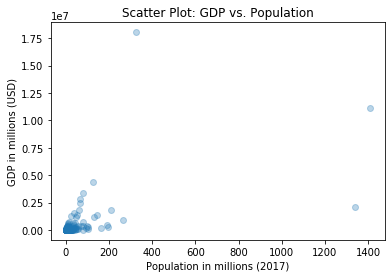

In [13]:
#Iza
#Graphical representation of relationships between data
#using mathplotlib to plot scatterplots

def plottingRelations(): 
    stats = pd.read_csv('country_statsd.csv')
    un = pd.read_csv('2019d.csv')
    
    print("Is there correlation between GDP and population size?")
    newpop = []
    for row in stats['Population in thousands (2017)']:
        y = row/1000 #The purpose of this is to make the scale of the graph better 
        newpop.append(y)   #by making population size more similar in scale to GDP size
    
    
    
    x = newpop  
    y = stats['GDP: Gross domestic product (million current US$)']

    plt.scatter(x,y, alpha =0.3) #Alpha controls transparency of plotted points
    plt.title('Scatter Plot: GDP vs. Population')
    plt.xlabel('Population in millions (2017)')
    plt.ylabel('GDP in millions (USD)')
    
plottingRelations()

In [45]:
#Sophia
# is there a correlation between country population and happiness?

def findCorrs():
    happyFile = pd.read_csv('2019d.csv')
    regionFile = pd.read_csv('country_statsd.csv')

    # regionFile = pd.read_csv('country_statsd.csv', sep=r'\s*,\s*',
    #  header=0, encoding='ascii', engine='python')

    Countries1 = {}
    Countries2 = {}

    for index, row in happyFile.iterrows():
        Countries1[row['Country or region']] = row

    for index, row in regionFile.iterrows():
        Countries2[row['country']] = row

    print(Countries1['USA'])
    # print(Countries2['USA'])

    # Countries => [{Germany}, {Poland...}]
    # Continent => {Europe: [...], }

    # which continent has the biggest gap between the top countries 
    # and bottom countries happiness
    # find top country, bottom country

    # first val is top country, second val is bottom country
    topBottomCountries = {
        'Europe': {},  # top score, bottomScore, topCountry, bottomCountry
        'North America': {},
        'South America': {},
        'Antarctica': {},
        'Asia': {},
        'Australia': {},
        'Africa': {}
    }


    regionsConts = {
        'EasternEurope': 'Europe',
        'WesternEurope': 'Europe',
        'SouthernEurope': 'Europe',
        'Caribbean': 'North America',
        'CentralAmerica': 'North America',
        'SouthAmerica': 'South America',
        'CentralAsia': 'Asia',
        'EasternAsia': 'Asia',
        'SouthernAsia': 'Asia',
        'South-easternAsia': 'Asia',
        'WesternAsia': 'Asia',
        'Melanesia': 'Australia',
        'Micronesia': 'Australia',
        'Polynesia': 'Australia',
        'Oceania': 'Australia',
        'NorthernEurope': 'Europe',
        'NorthernAmerica': 'North America',
        'EasternAfrica': 'Africa',
        'MiddleAfrica': 'Africa',
        'NorthernAfrica': 'Africa',
        'WesternAfrica': 'Africa',
        'SouthernAfrica': 'Africa'
    }

    countries = {}

    # look at regionsFile
    for index, row in regionFile.iterrows():
        # decide which country we're looking at
        countryName = Countries2[row['country']]['country']

        # add that country's score to our new dict
        # countries[countryName] = Countries1[countryName]['Score']

        # print(row['Region'])
        # we're looking the data for a continent here
        focus = topBottomCountries[regionsConts[row['Region']]]
        #topScore, bottomScore, topCountry, bottomCountry
        # print(focus['topScore'])
    
        if 'topScore' in focus:
            # there's a score
            # compare scores
            # possibly update new top & country
            if focus['topScore'] < Countries1[countryName]['Score']:
                focus['topScore'] = Countries1[countryName]['Score']
                focus['topCountry'] = countryName
        else:
            focus['topScore'] = Countries1[countryName]['Score']
            focus['topCountry'] = countryName

        if 'bottomScore' in focus:
            if focus['bottomScore'] > Countries1[countryName]['Score']:
                focus['bottomScore'] = Countries1[countryName]['Score']
                focus['bottomCountry'] = countryName
        else:
            focus['bottomScore'] = Countries1[countryName]['Score']
            focus['bottomCountry'] = countryName


    print(topBottomCountries)

    # loop through regionsFile looking at country
    # store score of country by continent


        # for target_list in expression_list:
    #    pass
    
findCorrs()

Overall rank                       19
Country or region                 USA
Score                           6.892
GDP per capita                  1.433
Social support                  1.457
Healthy life expectancy         0.874
Freedom to make life choices    0.454
Generosity                       0.28
Perceptions of corruption       0.128
Name: 145, dtype: object
{'Europe': {'topScore': 7.769, 'topCountry': 'Finland', 'bottomScore': 4.332, 'bottomCountry': 'Ukraine'}, 'North America': {'topScore': 7.278, 'topCountry': 'Canada', 'bottomScore': 3.597, 'bottomCountry': 'Haiti'}, 'South America': {'topScore': 6.444, 'topCountry': 'Chile', 'bottomScore': 4.707, 'bottomCountry': 'Venezuela'}, 'Antarctica': {}, 'Asia': {'topScore': 7.138999999999999, 'topCountry': 'Israel', 'bottomScore': 3.2030000000000003, 'bottomCountry': 'Afghanistan'}, 'Australia': {'topScore': 7.307, 'topCountry': 'New Zealand', 'bottomScore': 7.228, 'bottomCountry': 'Australia'}, 'Africa': {'topScore': 5.888, 'topCoun